In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import json

from collections import defaultdict
from collections import Counter

# 1) USA.gov Data from Bitly

In [4]:
path = 'data/DATA_01_bitly.txt'

In [5]:
with open(path) as f:
    line = f.readline()
    print(line)

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [8]:
records=[json.loads(line) for line in open (path)]

In [9]:
len(records)

3560

In [11]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [15]:
# iz kerih časovnih pasov oz lokaciji so dostopali na naš server
#prvo v pythonu:

time_zones=[rec['tz'] for rec in records] #pazi ker če mu ne daš kaj naj naredi ob errorju on se sesuje ob prvem errorju


KeyError: 'tz'

In [16]:
time_zones=[rec['tz'] for rec in records if 'tz' in rec]
len(time_zones)

3440

In [17]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [18]:
def get_counts(sequence):
    counts={}
    for x in sequence:
        if x in counts:
            counts[x]+=1
        else:
            counts[x]=1
    return counts

In [19]:
counts=get_counts(time_zones)
counts['America/New_York'] # preštejemo koliko jih je iz newyorka

1251

In [ ]:
#defoult dict nove vrednosti inicializita na 0

In [20]:
def get_counts2(sequence):
    counts=defaultdict(int)
    for x in sequence:
      
            counts[x]+=1
       
    return counts

In [25]:
counts=get_counts(time_zones)
counts['America/New_York'] # na tak način se rešiš preglredovanja.

1251

In [40]:
# pokaži prvih 10 najpogostejših.

def top_counts (count_dict, n=10):
    value_key_pairs=[(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [41]:
top_counts(counts, n=10)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [32]:
#drugi način
counts=Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [33]:
frame=pd.DataFrame(records)
frame.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [35]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [36]:
tz_counts=frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [37]:
#prazne vrednosti dopolni z poljubno vrednostjo

clean_tz= frame['tz'].fillna('Missing')


In [38]:
clean_tz[clean_tz=='']='Unknown' #tm kjer je prazno dej unknown

In [39]:
tz_counts=clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

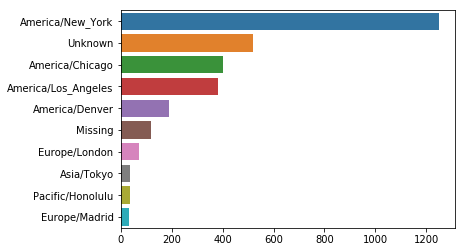

In [44]:
subset=tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values)

In [45]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [46]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [47]:
frame['a'][51]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

In [48]:
frame['a'][51].split()[0]

'Mozilla/5.0'

In [51]:
results=pd.Series([x.split()[0] for x in frame['a'].dropna()])
results.head()

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [52]:
results.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
BlackBerry8520/5.0.0.592       3
Dalvik/1.4.0                   3
dtype: int64

In [53]:
#koliko je wind. uporabnikov in koliko je ostalih. prvo spuci datframe

cframe=frame[frame['a'].notnull()].copy()
cframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3440 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    0 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 510.6+ KB


In [54]:
cframe['os']=np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not windows')
cframe['os'].head()

0        Windows
1    Not windows
2        Windows
3    Not windows
4        Windows
Name: os, dtype: object

In [56]:
by_tz_os=cframe.groupby(['tz','os'])

In [58]:
agg_counts=by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

os,Not windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [59]:
indexer =agg_counts.sum(1).argsort()
indexer.head()

tz
                       24
Africa/Cairo           20
Africa/Casablanca      21
Africa/Ceuta           92
Africa/Johannesburg    87
dtype: int64

In [60]:
count_subset=agg_counts.take(indexer[-10:])

In [61]:
count_subset

os,Not windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [62]:
#isto
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [64]:
count_subset.stack().unstack() #pretvorba med dataf. in printom

os,Not windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [65]:
count_subset=count_subset.stack()

In [69]:
count_subset.name='total'


In [70]:
count_subset=count_subset.reset_index()
count_subset[:10]

,index,tz,os,total
0,0,America/Sao_Paulo,Not windows,13.0
1,1,America/Sao_Paulo,Windows,20.0
2,2,Europe/Madrid,Not windows,16.0
3,3,Europe/Madrid,Windows,19.0
4,4,Pacific/Honolulu,Not windows,0.0
5,5,Pacific/Honolulu,Windows,36.0
6,6,Asia/Tokyo,Not windows,2.0
7,7,Asia/Tokyo,Windows,35.0
8,8,Europe/London,Not windows,43.0
9,9,Europe/London,Windows,31.0


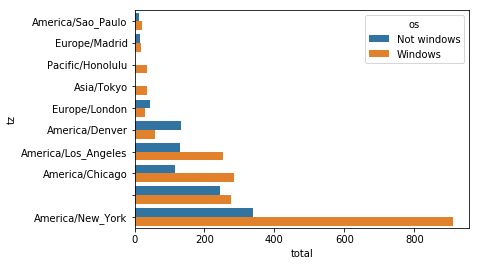

In [72]:
sns.barplot(x='total',y='tz', hue='os', data=count_subset)

In [82]:
# kako normiramo podatke
def norm_total(group):
    group['normed_total']=group['total']/group['total'].sum()
    return group

In [83]:
results=count_subset.groupby('tz').apply(norm_total)
results.head()

,index,tz,os,total,normed_total
0,0,America/Sao_Paulo,Not windows,13.0,0.393939
1,1,America/Sao_Paulo,Windows,20.0,0.606061
2,2,Europe/Madrid,Not windows,16.0,0.457143
3,3,Europe/Madrid,Windows,19.0,0.542857
4,4,Pacific/Honolulu,Not windows,0.0,0.000000


In [ ]:
sns.barplot(x='normed_total',)